In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_mar = pd.read_csv('calendar_china_17_3.csv')

In [3]:
df_feb = pd.read_csv('calendar_china_20_2.csv')

In [4]:
df_jan = pd.read_csv('calendar_china_13_1.csv')

In [5]:
df_mar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1610503,2020-03-17,f,$505.00,$505.00,1,1125
1,782604,2020-03-17,f,$737.00,$737.00,27,365
2,782604,2020-03-18,f,$737.00,$737.00,27,365
3,782604,2020-03-19,f,$737.00,$737.00,27,365
4,782604,2020-03-20,f,$737.00,$737.00,27,365


In [6]:
df_feb.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1606207,2020-02-21,t,"$1,812.00","$1,812.00",1.0,60.0
1,782604,2020-02-21,f,$737.00,$737.00,27.0,365.0
2,782604,2020-02-22,f,$737.00,$737.00,27.0,365.0
3,782604,2020-02-23,f,$737.00,$737.00,27.0,365.0
4,782604,2020-02-24,f,$737.00,$737.00,27.0,365.0


In [7]:
df_feb.available.value_counts()

f    2256948
t    2199418
Name: available, dtype: int64

In [8]:
df_mar.available.value_counts()

f    2199054
t    2098091
Name: available, dtype: int64

In [9]:
df = df_jan.merge(df_feb, on=['listing_id', 'date'], suffixes=['_jan','_feb']).merge(df_mar,on=['listing_id', 'date'], suffixes=['','_mar'])

In [10]:
df.head()

,listing_id,date,available_jan,price_jan,adjusted_price_jan,minimum_nights_jan,maximum_nights_jan,available_feb,price_feb,adjusted_price_feb,minimum_nights_feb,maximum_nights_feb,available,price,adjusted_price,minimum_nights,maximum_nights
0,69074,2020-03-17,t,"$1,422.00","$1,422.00",3.0,365.0,t,$933.00,$933.00,3.0,365.0,f,$932.00,$932.00,3,365
1,69074,2020-03-18,t,"$1,640.00","$1,640.00",4.0,365.0,t,$933.00,$933.00,4.0,365.0,f,$932.00,$932.00,4,365
2,69074,2020-03-19,t,"$1,445.00","$1,445.00",3.0,365.0,t,$933.00,$933.00,3.0,365.0,f,$932.00,$932.00,3,365
3,69074,2020-03-20,t,"$1,438.00","$1,438.00",3.0,365.0,t,$933.00,$933.00,3.0,365.0,f,$932.00,$932.00,3,365
4,69074,2020-03-21,t,"$1,430.00","$1,430.00",3.0,365.0,t,$933.00,$933.00,3.0,365.0,f,$932.00,$932.00,3,365


In [11]:
df.dtypes

listing_id              int64
date                   object
available_jan          object
price_jan              object
adjusted_price_jan     object
minimum_nights_jan    float64
maximum_nights_jan    float64
available_feb          object
price_feb              object
adjusted_price_feb     object
minimum_nights_feb    float64
maximum_nights_feb    float64
available              object
price                  object
adjusted_price         object
minimum_nights          int64
maximum_nights          int64
dtype: object

In [12]:
df['date'] = pd.to_datetime(df.date)

In [13]:
df[['available_jan','available_feb','available_mar']] = df[['available_jan','available_feb','available']].replace({'f':0,'t':1}).astype('bool')

In [14]:
df.dtypes

listing_id                     int64
date                  datetime64[ns]
available_jan                   bool
price_jan                     object
adjusted_price_jan            object
minimum_nights_jan           float64
maximum_nights_jan           float64
available_feb                   bool
price_feb                     object
adjusted_price_feb            object
minimum_nights_feb           float64
maximum_nights_feb           float64
available                     object
price                         object
adjusted_price                object
minimum_nights                 int64
maximum_nights                 int64
available_mar                   bool
dtype: object

In [15]:
df.groupby('date')[['available_jan','available_feb','available_mar']].sum()

,available_jan,available_feb,available_mar
date,,,
2020-03-17,6915.0,6633.0,5525.0
2020-03-18,6908.0,6639.0,3706.0
2020-03-19,6905.0,6645.0,5412.0
2020-03-20,6876.0,6627.0,5588.0
2020-03-21,6866.0,6630.0,5694.0
2020-03-22,6880.0,6651.0,5772.0
2020-03-23,6891.0,6665.0,5802.0
2020-03-24,6896.0,6666.0,5850.0
2020-03-25,6929.0,6676.0,6008.0


In [16]:
df['month'] = pd.DatetimeIndex(df.date).month

In [17]:
df['year'] = pd.DatetimeIndex(df.date).year

In [18]:
df['y_m']=df['date'].dt.to_period('M')

In [19]:
df.head()

,listing_id,date,available_jan,price_jan,adjusted_price_jan,minimum_nights_jan,maximum_nights_jan,available_feb,price_feb,adjusted_price_feb,...,maximum_nights_feb,available,price,adjusted_price,minimum_nights,maximum_nights,available_mar,month,year,y_m
0,69074,2020-03-17,True,"$1,422.00","$1,422.00",3.0,365.0,True,$933.00,$933.00,...,365.0,f,$932.00,$932.00,3,365,False,3,2020,2020-03
1,69074,2020-03-18,True,"$1,640.00","$1,640.00",4.0,365.0,True,$933.00,$933.00,...,365.0,f,$932.00,$932.00,4,365,False,3,2020,2020-03
2,69074,2020-03-19,True,"$1,445.00","$1,445.00",3.0,365.0,True,$933.00,$933.00,...,365.0,f,$932.00,$932.00,3,365,False,3,2020,2020-03
3,69074,2020-03-20,True,"$1,438.00","$1,438.00",3.0,365.0,True,$933.00,$933.00,...,365.0,f,$932.00,$932.00,3,365,False,3,2020,2020-03
4,69074,2020-03-21,True,"$1,430.00","$1,430.00",3.0,365.0,True,$933.00,$933.00,...,365.0,f,$932.00,$932.00,3,365,False,3,2020,2020-03


In [20]:
available = df.groupby(['y_m'],as_index=True)[['available_jan','available_feb','available_mar']].sum()

In [21]:
df.groupby(['y_m']).listing_id.count()

y_m
2020-03    166770
2020-04    333540
2020-05    344658
2020-06    333540
2020-07    344658
2020-08    344658
2020-09    333540
2020-10    344658
2020-11    333540
2020-12    344658
2021-01    129470
2021-02         6
Freq: M, Name: listing_id, dtype: int64

In [22]:
available

,available_jan,available_feb,available_mar
y_m,,,
2020-03,103734.0,100095.0,86016.0
2020-04,183618.0,204656.0,197707.0
2020-05,174778.0,202016.0,213033.0
2020-06,169968.0,169409.0,188776.0
2020-07,154594.0,174678.0,173019.0
2020-08,143490.0,162201.0,173126.0
2020-09,139320.0,139526.0,151631.0
2020-10,139955.0,143408.0,142771.0
2020-11,134044.0,136182.0,137642.0


In [23]:
for col in available.columns:
    available[col]=1-(available[col]/df.groupby(['y_m']).listing_id.count())
available

,available_jan,available_feb,available_mar
y_m,,,
2020-03,0.377982,0.399802,0.484224
2020-04,0.449487,0.386412,0.407247
2020-05,0.492894,0.413865,0.381900
2020-06,0.490412,0.492088,0.434023
2020-07,0.551457,0.493185,0.497998
2020-08,0.583674,0.529386,0.497688
2020-09,0.582299,0.581681,0.545389
2020-10,0.593931,0.583912,0.585760
2020-11,0.598117,0.591707,0.587330


In [24]:
available.drop(columns=['available_jan'],inplace=True)

In [24]:
sns.set()

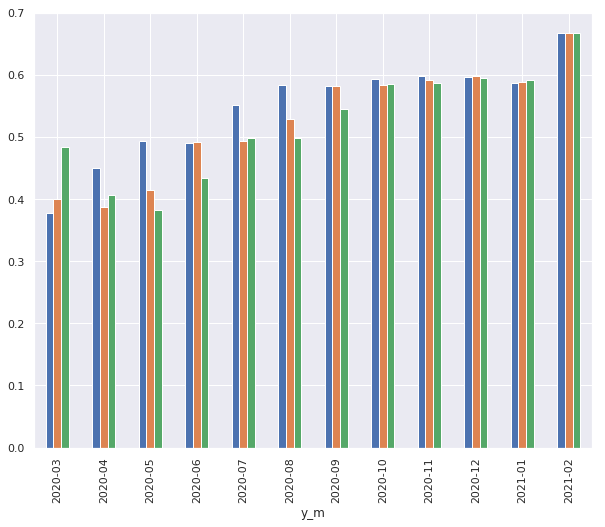

In [28]:
available.plot(kind='bar',legend=False, figsize=(10,8)); #tasa de ocupacion

In [ ]:
# dates: 11/3 WHO declared covid-19 a pandemic
#  9/3 se suspenden las clases en madrid
# 14/3 empieza la cuarentena

Q1: como bajaron los alquileres de airbnb para los meses que siguen.

In [88]:
apt_mar = pd.read_csv('listings_17_3.csv')
apt_feb = pd.read_csv('listings_18_2.csv')
apt_jan = pd.read_csv('listings_10_1.csv')

In [89]:
apt_jan.shape[0],apt_feb.shape[0],apt_mar.shape[0]

(21495, 21845, 22170)

In [90]:
apt_feb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [91]:
apt = apt_jan.merge(apt_feb, on=['id'], suffixes=['_jan','_feb']).merge(apt_mar,on=['id'], suffixes=['','_mar'])

In [6]:
apt.head()

,id,name_jan,host_id_jan,host_name_jan,neighbourhood_group_jan,neighbourhood_jan,latitude_jan,longitude_jan,room_type_jan,price_jan,...,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,...,40.45724,-3.67688,Private room,70,1,75,2020-02-29,0.62,1,76
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,17,...,40.40341,-3.74084,Private room,30,4,33,2018-07-15,0.50,2,228
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,50,...,40.38695,-3.69304,Entire home/apt,50,15,0,NaN,NaN,6,277
3,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,...,40.42202,-3.70395,Entire home/apt,89,4,10,2020-03-01,0.15,1,335
4,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,...,40.41995,-3.69764,Entire home/apt,115,3,68,2020-01-26,0.64,1,327


In [96]:
apt.shape

(19463, 46)

In [106]:
apt.columns

Index(['id', 'name_jan', 'host_id_jan', 'host_name_jan',
       'neighbourhood_group_jan', 'neighbourhood_jan', 'latitude_jan',
       'longitude_jan', 'room_type_jan', 'price_jan', 'minimum_nights_jan',
       'number_of_reviews_jan', 'last_review_jan', 'reviews_per_month_jan',
       'calculated_host_listings_count_jan', 'availability_365_jan',
       'name_feb', 'host_id_feb', 'host_name_feb', 'neighbourhood_group_feb',
       'neighbourhood_feb', 'latitude_feb', 'longitude_feb', 'room_type_feb',
       'price_feb', 'minimum_nights_feb', 'number_of_reviews_feb',
       'last_review_feb', 'reviews_per_month_feb',
       'calculated_host_listings_count_feb', 'availability_365_feb', 'name',
       'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [21]:
df2=apt[['id','availability_365_jan', 'availability_365_feb', 'availability_365']]

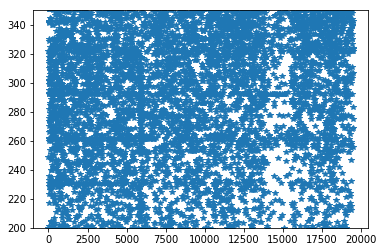

In [20]:
plt.figsize=(20,20)
plt.ylim(200,350)
plt.plot(apt['availability_365_feb'],'*')

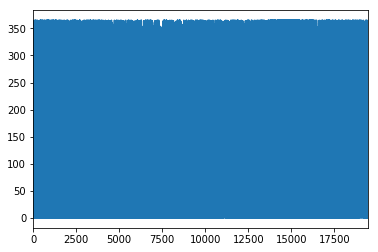

In [12]:
plt.xlim(0,100)
apt['availability_365_feb'].plot.line()

In [131]:
apt['availability_365_feb']

dtype('int64')

In [22]:
df2.describe()

,id,availability_365_jan,availability_365_feb,availability_365
count,1.946300e+04,19463.000000,19463.000000,19463.000000
mean,2.468494e+07,161.628012,159.044032,166.927144
std,1.152269e+07,135.857551,132.060692,134.510306
min,6.369000e+03,0.000000,0.000000,0.000000
25%,1.667010e+07,21.000000,26.000000,30.000000
50%,2.583854e+07,142.000000,140.000000,156.000000
75%,3.486266e+07,308.000000,292.000000,302.000000
max,4.144964e+07,365.000000,365.000000,365.000000


In [23]:
apt.describe()

,id,host_id_jan,latitude_jan,longitude_jan,price_jan,minimum_nights_jan,number_of_reviews_jan,reviews_per_month_jan,calculated_host_listings_count_jan,availability_365_jan,...,availability_365_feb,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.946300e+04,1.946300e+04,19463.000000,19463.000000,19463.000000,19463.000000,19463.000000,15689.000000,19463.000000,19463.000000,...,19463.000000,1.946300e+04,19463.000000,19463.000000,19463.000000,19463.000000,19463.000000,16216.000000,19463.000000,19463.000000
mean,2.468494e+07,1.067608e+08,40.420570,-3.694340,134.893079,4.453681,39.741972,2.021068,11.590094,161.628012,...,159.044032,1.067546e+08,40.420565,-3.694343,159.541694,4.666290,42.562246,1.941925,11.952012,166.927144
std,1.152269e+07,9.484091e+07,0.021861,0.027865,376.302018,22.206389,67.384187,1.986499,33.001516,135.857551,...,132.060692,9.483517e+07,0.021861,0.027867,514.697899,24.694499,69.946872,1.948797,33.599146,134.510306
min,6.369000e+03,5.154000e+03,40.332470,-3.863910,1.000000,1.000000,0.000000,0.010000,1.000000,0.000000,...,0.000000,5.154000e+03,40.332470,-3.863910,1.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.667010e+07,2.344116e+07,40.409620,-3.707490,40.000000,1.000000,1.000000,0.460000,1.000000,21.000000,...,26.000000,2.344116e+07,40.409610,-3.707500,40.000000,1.000000,2.000000,0.410000,1.000000,30.000000
50%,2.583854e+07,8.047398e+07,40.418820,-3.701210,65.000000,2.000000,10.000000,1.400000,2.000000,142.000000,...,140.000000,8.047398e+07,40.418910,-3.701240,65.000000,2.000000,12.000000,1.300000,2.000000,156.000000
75%,3.486266e+07,1.825395e+08,40.428810,-3.688785,105.000000,3.000000,48.000000,3.040000,6.000000,308.000000,...,292.000000,1.825395e+08,40.428820,-3.688805,105.000000,3.000000,52.000000,2.930000,7.000000,302.000000
max,4.144964e+07,3.259603e+08,40.562740,-3.527660,9999.000000,1125.000000,634.000000,42.810000,252.000000,365.000000,...,365.000000,3.259603e+08,40.562740,-3.527660,9999.000000,1125.000000,659.000000,40.120000,252.000000,365.000000


Lo de recien va con la misma pregunta de antes.

Q: cuanta plata pierde airbnb? agarrar los que pasaron de ocupados a libres y sumar el costo de la noche

Como cambiaron los precios en marzo? adjusted_price for the availables

In [ ]:
# Q2: ver que pasa en paises de europa del norte?

In [27]:
df.columns

Index(['listing_id', 'date', 'available_jan', 'price_jan',
       'adjusted_price_jan', 'minimum_nights_jan', 'maximum_nights_jan',
       'available_feb', 'price_feb', 'adjusted_price_feb',
       'minimum_nights_feb', 'maximum_nights_feb', 'available', 'price',
       'adjusted_price', 'minimum_nights', 'maximum_nights', 'available_mar',
       'month', 'year', 'y_m'],
      dtype='object')

In [28]:
df.head()

,listing_id,date,available_jan,price_jan,adjusted_price_jan,minimum_nights_jan,maximum_nights_jan,available_feb,price_feb,adjusted_price_feb,...,maximum_nights_feb,available,price,adjusted_price,minimum_nights,maximum_nights,available_mar,month,year,y_m
0,96072,2020-03-17,False,$25.00,$25.00,3.0,365.0,False,$25.00,$25.00,...,365,f,$25.00,$25.00,3,365,False,3,2020,2020-03
1,96072,2020-03-18,False,$25.00,$25.00,3.0,365.0,False,$25.00,$25.00,...,365,f,$25.00,$25.00,3,365,False,3,2020,2020-03
2,96072,2020-03-19,False,$25.00,$25.00,3.0,365.0,False,$25.00,$25.00,...,365,f,$25.00,$25.00,3,365,False,3,2020,2020-03
3,96072,2020-03-20,False,$25.00,$25.00,3.0,365.0,False,$25.00,$25.00,...,365,f,$25.00,$25.00,3,365,False,3,2020,2020-03
4,96072,2020-03-21,False,$25.00,$25.00,3.0,365.0,False,$25.00,$25.00,...,365,f,$25.00,$25.00,3,365,False,3,2020,2020-03


In [40]:
des.dtypes

listing_id                     int64
date                  datetime64[ns]
available_jan                   bool
price_jan                     object
adjusted_price_jan            object
minimum_nights_jan           float64
maximum_nights_jan           float64
available_feb                   bool
price_feb                     object
adjusted_price_feb            object
minimum_nights_feb             int64
maximum_nights_feb             int64
available                     object
price                         object
adjusted_price                object
minimum_nights                 int64
maximum_nights                 int64
available_mar                   bool
month                          int64
year                           int64
y_m                        period[M]
dtype: object

I need to convert price to number

In [60]:
prices = ['price_jan','adjusted_price_jan','price_feb','adjusted_price_feb','price','adjusted_price']
for col in prices:
    df[col] = df[col].str.replace('$','').str.replace(',','').astype('float')

In [61]:
df.head()

,listing_id,date,available_jan,price_jan,adjusted_price_jan,minimum_nights_jan,maximum_nights_jan,available_feb,price_feb,adjusted_price_feb,...,maximum_nights_feb,available,price,adjusted_price,minimum_nights,maximum_nights,available_mar,month,year,y_m
0,96072,2020-03-17,False,25.0,25.0,3.0,365.0,False,25.0,25.0,...,365,f,25.0,25.0,3,365,False,3,2020,2020-03
1,96072,2020-03-18,False,25.0,25.0,3.0,365.0,False,25.0,25.0,...,365,f,25.0,25.0,3,365,False,3,2020,2020-03
2,96072,2020-03-19,False,25.0,25.0,3.0,365.0,False,25.0,25.0,...,365,f,25.0,25.0,3,365,False,3,2020,2020-03
3,96072,2020-03-20,False,25.0,25.0,3.0,365.0,False,25.0,25.0,...,365,f,25.0,25.0,3,365,False,3,2020,2020-03
4,96072,2020-03-21,False,25.0,25.0,3.0,365.0,False,25.0,25.0,...,365,f,25.0,25.0,3,365,False,3,2020,2020-03


In [62]:
df.describe()

,listing_id,price_jan,adjusted_price_jan,minimum_nights_jan,maximum_nights_jan,price_feb,adjusted_price_feb,minimum_nights_feb,maximum_nights_feb,price,adjusted_price,minimum_nights,maximum_nights,month,year
count,5.816067e+06,5.815896e+06,5.815896e+06,5.816067e+06,5.816067e+06,5.816067e+06,5.816067e+06,5.816067e+06,5.816067e+06,5.816067e+06,5.816067e+06,5.816067e+06,5.816067e+06,5.816067e+06,5.816067e+06
mean,2.468448e+07,1.515582e+02,1.511158e+02,4.713514e+00,7.037037e+03,1.471331e+02,1.467556e+02,4.848039e+00,7.047539e+03,1.435413e+02,1.431948e+02,4.948706e+00,7.057382e+03,7.548943e+00,2.020030e+03
std,1.152404e+07,4.801698e+02,4.786581e+02,2.263152e+01,8.006143e+05,4.430847e+02,4.424041e+02,2.369655e+01,8.006142e+05,4.246254e+02,4.246795e+02,2.380397e+01,8.006141e+05,2.936458e+00,1.693099e-01
min,6.369000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.020000e+03
25%,1.665787e+07,4.000000e+01,4.000000e+01,1.000000e+00,4.000000e+01,4.100000e+01,4.100000e+01,1.000000e+00,4.500000e+01,4.000000e+01,4.000000e+01,1.000000e+00,6.000000e+01,5.000000e+00,2.020000e+03
50%,2.583854e+07,7.500000e+01,7.400000e+01,2.000000e+00,1.125000e+03,7.500000e+01,7.500000e+01,2.000000e+00,1.125000e+03,7.200000e+01,7.100000e+01,2.000000e+00,1.125000e+03,8.000000e+00,2.020000e+03
75%,3.486287e+07,1.250000e+02,1.250000e+02,3.000000e+00,1.125000e+03,1.250000e+02,1.250000e+02,3.000000e+00,1.125000e+03,1.220000e+02,1.210000e+02,3.000000e+00,1.125000e+03,1.000000e+01,2.020000e+03
max,4.144964e+07,1.023500e+04,1.023500e+04,1.125000e+03,1.111111e+08,1.311000e+04,1.311000e+04,1.125000e+03,1.111111e+08,1.311000e+04,1.311000e+04,1.125000e+03,1.111111e+08,1.200000e+01,2.021000e+03


In [65]:
#los que pasaron a estar disponibles
des = df[ (df.date < '2020-10-01') & (df.available_feb == False) & (df.available_mar == True) ]
des.shape

(290287, 21)

In [66]:
#los que pasaron a estar ocupados
ocu = df[ (df.date < '2020-10-01') & (df.available_feb == True) & (df.available_mar == False) ]
ocu.shape

(146618, 21)

In [38]:
# podria juntarlos con el otro data frame por id y ver que tipo de alojamientos se desocuparon y cuales se ocuparon

In [69]:
des['price'].describe()

count    290287.000000
mean        112.624168
std         175.226829
min           9.000000
25%          49.000000
50%          75.000000
75%         117.000000
max        8904.000000
Name: price, dtype: float64

In [70]:
des['price'].sum()

32693332.0

In [71]:
ocu['price'].describe()

count    146618.000000
mean        134.063833
std         445.608999
min           9.000000
25%          44.000000
50%          74.000000
75%         114.000000
max       10000.000000
Name: price, dtype: float64

outliers? I went to the airbnb website to check and this prices are real!

In [72]:
ocu['price'].sum()

19656171.0

In [75]:
(19656171.0-32693332.0)*14/100

-1825202.54

This is aprox what airbnb loses

In [79]:
#both statistics are very similar -> probably the type are very similar too

In [83]:
(df['price']-df['adjusted_price']).describe()

count    5.816067e+06
mean     3.464845e-01
std      4.757482e+00
min     -1.662000e+03
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.000000e+02
dtype: float64

In [84]:
df['price'].mean(),df['adjusted_price'].mean()

(143.54132268421253, 143.19483819563976)

In [85]:
dfav = df[df.available_mar==True]

In [86]:
dfav['price'].mean(),dfav['adjusted_price'].mean()

(139.7775389664307, 139.2951948977249)

In [92]:
apt.head()

,id,name_jan,host_id_jan,host_name_jan,neighbourhood_group_jan,neighbourhood_jan,latitude_jan,longitude_jan,room_type_jan,price_jan,...,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,...,40.45724,-3.67688,Private room,70,1,75,2020-02-29,0.62,1,76
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,17,...,40.40341,-3.74084,Private room,30,4,33,2018-07-15,0.50,2,228
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,50,...,40.38695,-3.69304,Entire home/apt,50,15,0,NaN,NaN,6,277
3,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,...,40.42202,-3.70395,Entire home/apt,89,4,10,2020-03-01,0.15,1,335
4,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,...,40.41995,-3.69764,Entire home/apt,115,3,68,2020-01-26,0.64,1,327


In [93]:
apt.room_type.value_counts()

Entire home/apt    12018
Private room        6897
Shared room          301
Hotel room           247
Name: room_type, dtype: int64

In [97]:
apt[apt.availability_365 > apt.availability_365_feb].room_type.value_counts()/apt.room_type.value_counts() #des

Entire home/apt    0.578549
Private room       0.409453
Shared room        0.401993
Hotel room         0.457490
Name: room_type, dtype: float64

In [98]:
apt[apt.availability_365 < apt.availability_365_feb].room_type.value_counts()/apt.room_type.value_counts() #ocu

Entire home/apt    0.214179
Hotel room         0.465587
Private room       0.158620
Shared room        0.149502
Name: room_type, dtype: float64